{'ACB': 355, 'ABC': 498, 'BAC': 288, 'BCA': 213, 'CBA': 152, 'CAB': 165}


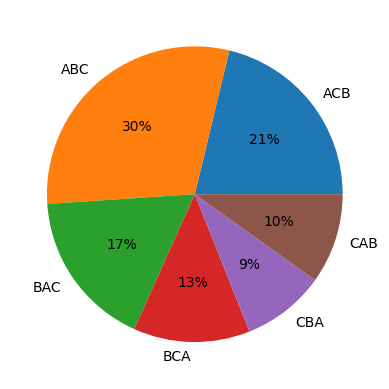

In [47]:
import glob
import matplotlib.pyplot as plt
import seaborn as sns


data = {}
for log in glob.glob("logs/*.txt"):
    with open(log) as f:
        events = ""
        for line in f:
            if "eEventA processed" in line:
                events += "A"
            if "eEventB processed" in line:
                events += "B"
            if "eEventC processed" in line:
                events += "C"
        if events:
            if events not in data:
                data[events] = 0
            data[events] += 1
print(data)


plt.pie(data.values(), labels = data.keys(), autopct='%.0f%%')
plt.show()
        
